<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Basics

**Input Image -> CNN -> Output Label(Image class)**

Used for image recognition, facial recognition etc.



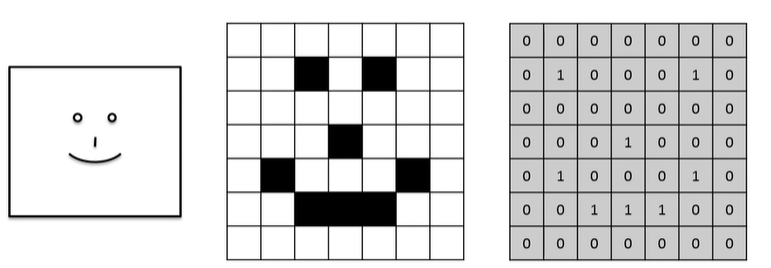

### Step-1: Convulution operation

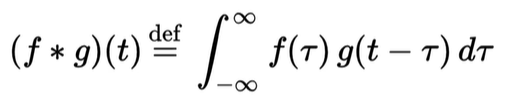

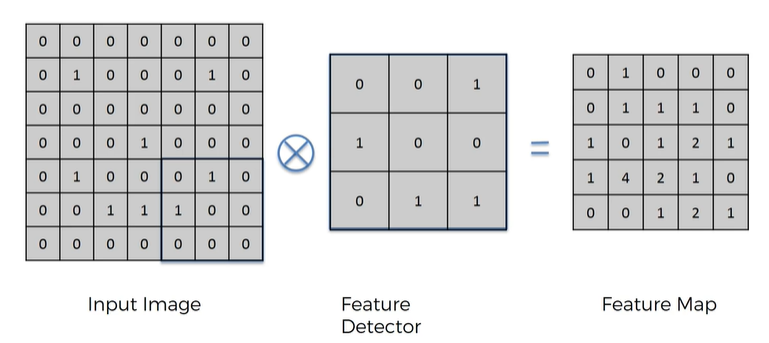

We try to match each block of the input image, with **Feature detector(Filter/ Kernel, size can be any)**, and count number of 1's matched.
Feature map also called Activation map or convolved feature.

1. Size of the image reduced.
2. By having many features or kernels, we create many feature maps, forming a convolutional layer.

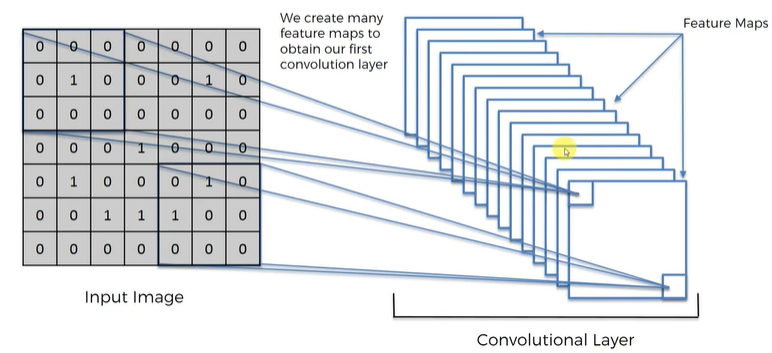

### Step-1(B): ReLU- Rectifier Linear Unit

Increase non-linearity in our network, rectifier helps in this.

In black-white images, it breaks the linearity of white-grey-black



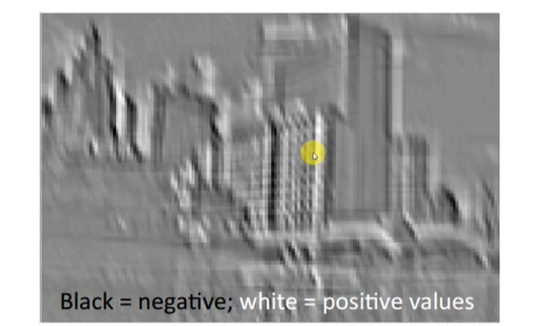

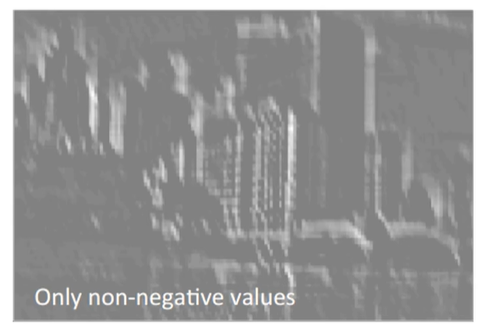

### Step-2: Pooling(Down-sampling)

Example: Recognizing cheetah when they are at different positions in images, tilted images with different features, etc

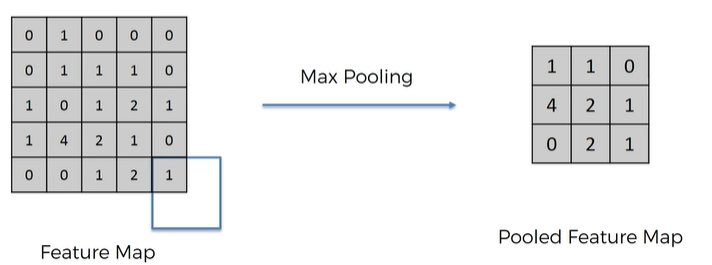

Selected maximum value among the 4 cells, with the stride of 2 (size 2x2)

1. Preserving the features
2. Reducing the size
3. Getting the same pooled feature map, even if we have difference in positions, etc.
4. Reducing parameters, thus avoiding over-fitting.

**Can apply any type of pooling, like min-pooling, sum-pooling, average-pooling, etc**

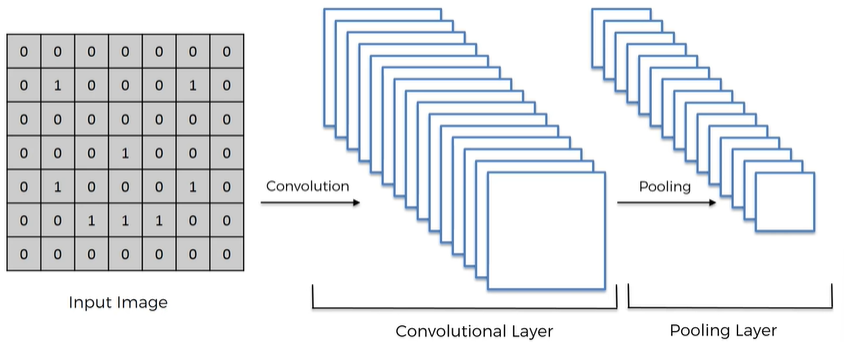

[CNN Practical site](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

### Step-3: Flattening

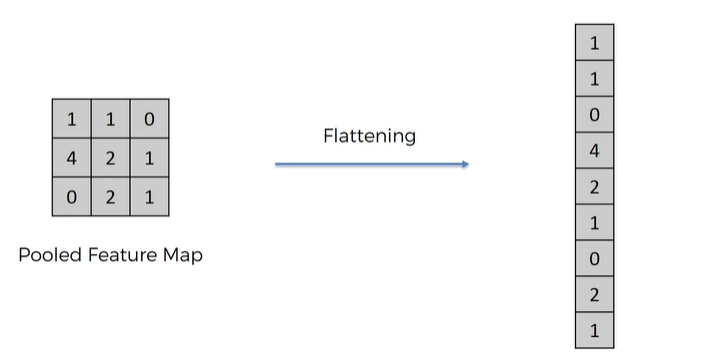

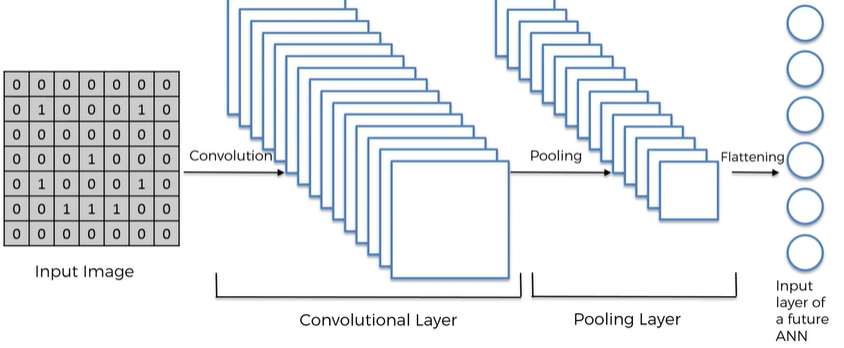

### Step-4: Full Connection

1. After flattening, each neuron in the input layer represents one of the reduced form of the image.

2. During the training period, output neurons already have the results, they can make out which neurons from the last fully connected layer, contributes more features or less features.

3. According to that, changes in the **weights as well as the feature detectors** are made during the epochs.

4. When given a test image(dog), the neurons with the dog's features will have higher value, and contribute more to the dog output neuron, and less to the cat output neuron, depending on the weights, whose values are decided during the training period.

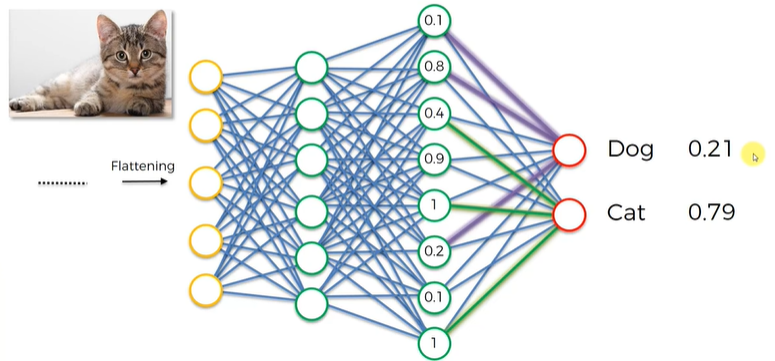

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

**Image Augmentation:** To avoid over-fitting, we need to transform(Geometrical transformations e.g. zoom in/out, rotate, flips, etc) the image. 

### Generating images for the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# rescale: Divides each pixel by 255, brings them under 0 to 1 - Feature Scaling

### Creating the Training set

In [ ]:
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',  # this is the target directory
        target_size = (64, 64),  # all images will be resized to 150x150
        batch_size = 32,
        class_mode = 'binary')  # since we have binary outcome(cat or dog) and use binary_crossentropy loss, we need binary labels

### Generating images for the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Creating the Test set

In [ ]:
# this is a similar generator, for test data
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary')

Found 334 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# Number of filters/ feature detectors to be used in 1st layer are 32, 
# With size of 3x3
# And Activation function used as Rectifier function
# Input images will be of size 64x64, and coloured images

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None))
# pool_size: 2x2 matrix chosen and its maximum is chosen
# strides: 2 i.e. we slide by 2x2 format, avoiding overlapping
# padding: Ignore or add fake values to out-of-matrix cells

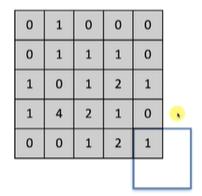

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Removed input_shape parameter
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Add hidden layer with 128 neurons

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x=training_set, validation_data=test_set, epochs=15)

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/dog.30.jpg', target_size = (64, 64)) # this is a PIL image
test_image = image.img_to_array(test_image)  # this is a Numpy array with shape (3, 64, 64)
# Even if we want to predict for a single image, it must be in batch
test_image = np.expand_dims(test_image, axis = 0)
# Dimension of batch is the first dimension, and then that image's dimension
# Basically converting 1-D array to 2-D array
result = cnn.predict(test_image)
training_set.class_indices # We get class of outputs, here dog - 1, cat - 0
if result[0][0] == 1:
  prediction = "Dog"
else: 
  prediction = "Cat"

In [ ]:
print(prediction)